Benjamin Graham, en su libro *'El inversor inteligente'*, describe varios puntos que, según él, distinguen a un inversor inteligente de un inversor especulativo. En esta investigación, nos centraremos en crear un portafolio de inversión para un inversionista defensivo, utilizando las estrategias recomendadas por Graham y con ayuda de algunos elementos del análisis técnico.

Para ello primero vamos a definir algunos puntos:

**Inversor defencivo**

Para Graham, existen dos tipos de inversores inteligentes: los defensivos y los emprendedores. Los primeros no tienen mucha tolerancia al riesgo y no están interesados en generar mayores rendimientos que el promedio; es decir, estos inversionistas buscan una inversión que no los involucre demasiado en el mercado con una ganancia promedio constante. Dado que la relación entre ganancia y riesgo es directamente proporcional, lo que quiere decir que se busca el mejor portafolio con la tasa de riesgo más baja

Graham describe que podemos identificar qué tan defensivo o emprendedor es un inversionista al observar la cantidad que tiene en su portafolio en activos de renta fija y en activos de renta variable. Cuanto mayor sea el porcentaje de activos de renta fija en su portafolio, más defensivo será el inversor. Por lo tanto, armaremos un portafolio con un 75% en renta fija y un 25% en variable.

**¿Por qué estos porcentajes?**

Partiendo de la premisa de que un portafolio 50/50 representa un equilibrio entre un inversionista ni tan defensivo ni tan emprendedor, buscamos el promedio (la mitad) de los inversionistas defensivos, para así buscar representar a la mayoría de estos inversionistas.

**Cápital Inicial**

Partimos de la hipótesis de que un inversionista defensivo representa la mayoría de los agentes económicos denomidados "*familias*". Por lo tanto, debemos crear un presupuesto asequible para estas familias, el cual se armará más adelante.

Es importante mencionar que esta investigación busca proporcionar herramientas a los inversionistas defensivos mexicanos. Por lo tanto, el contexto de los datos se realizará con información recabada de los mercados mexicanos.

**¿Como se va a componer la investigación?**

Esta investigación se compone de *tres* apartados. El primero consiste en una investigación para determinar el capital inicial, el segundo se destina a la obtención del 25% del portafolio, es decir, del capital variable del mismo, y el último se enfoca en buscar los mejores instrumentos de renta fija en el mercado mexicano.

# **Obtención del Capital Inicial.**

Según información de INEGI, en 2022 los ingresos corriente promedio de las familias mexicanas fueron de **$66,485**, como podemos ver en la siguiente tabla:

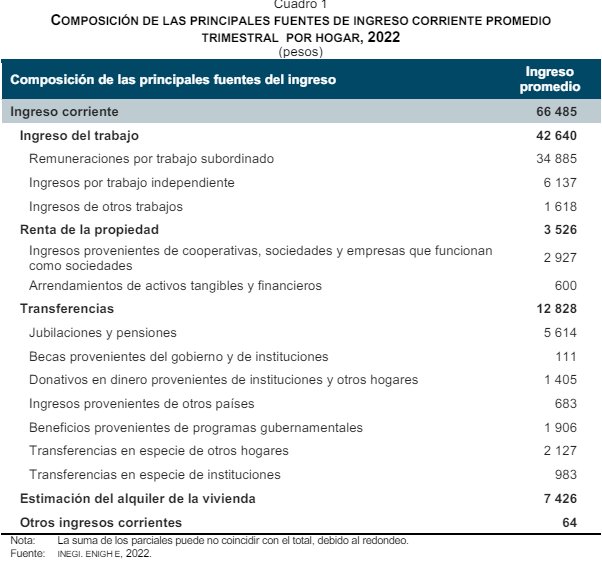

Esta información quiere decir, que las familias en promedio ingresas **66,485**$, a los cuales hay que restarles los costos que las familias tienen, para así conocer en promedio cuanto dinero las familias pueden destinar al ahorro. Dichos gastos los vemos a continuación:

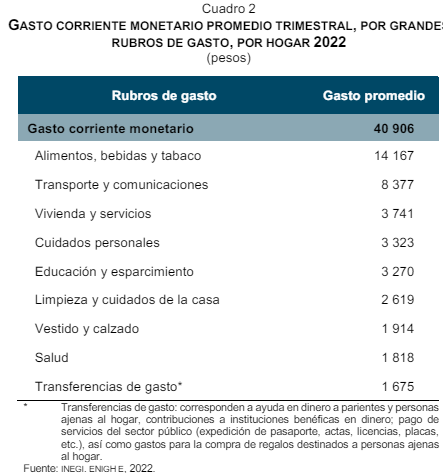

Podemos ver que estos gastos son de **40,906**$

In [4]:
# Una vez ya recabada esta información, creemos las variables donde almacenaremos esta, para su posterior utilización.
gasto_promedio_familias = 40906
ingresos_promedio_familias = 66485

# sacamos el posible ahorro, que las familias pueden tener.
posible_ingreso_ahorro = ingresos_promedio_familias - gasto_promedio_familias
print("Posible ahorro : {}" .format(posible_ingreso_ahorro))

Posible ahorro : 25579


Como podemos ver, el ingreso promedio de las familias, que no se destina al gasto es de **25,579**$ por trimestre, aunque hay que entender dos cosas:



1.   No todas las familias tienen este superavit en sus ingresos, pueden ser menores y hasta en algunos casos hasta nulos.
2.   Aunque las familias alcancen este ingreso disponible despues de sus gastos, no significa que pueden o esten en la facultad para destinar todo este, a la inversión. Partiendo además de que Graham describe que los inversionistas inteligentes deben dominar sus emociones y dejar que su portafolio gnere rendimientos al largo plazo.

Es por ello que debemos ajustar este dato, ademas de calcular su acumulado anual; ya que, vamos a suponer que las familias van a ahorrar por un año para destinar dicho ahorro a su portafolio.

In [6]:
# Obtenemos la mitad de los ingresos.
ingreso_ahorro_trimestre = posible_ingreso_ahorro / 2

# Sacamos el acumulado por un año.
capital_inicial = ingreso_ahorro_trimestre * 4
print("Capital Inicial : {}" .format(capital_inicial))

Capital Inicial : 51158.0


Concluimos que en promedio las familias mexicanas podrían ahorrar un total de **51,158**$ anualmente para destinarlo a la inversión del mercado bursátil.

# **Investigación del 25% del portafolio, acciones de rendimiento variable**

Si estas inversiones suelen ser mas riesgosas, ¿por qué invertir en estas? Por la sencilla razón de que aunque estas inversiones no te garantizan una rentabilidad, si te dan la posibilidad de obtener un rendimiento mucho mayor al de los activos de renta fija, además de que buscamos disminuir el riesgo de estos activos con un gran porcentaje del capital inicial destinado a activos de renta fija, los cuales tienen un riesgo casi nulo.

Por ello se debe hacer una investigación exhaustiva para conocer cuales son las mejores empresas que cotizan en Grupo Bolsa Mexicana de Valores, (GBMV) ya que, esta investigación se centra en México.

Graham menciona que para escoger en que empresas invertir no debemos enfocarnos en sus datos históricos como acción, sino en su *valor subyacente*, ¿A qué se refiere esto Benjamín Graham? Lo que Graham busca es que no veamos a las empresas como acciones ya que, es al revés las empresas no valen por sus acciones las acciones valen por las empresas, es por ello que se debe hacer un análisis exhaustivo de como las empresa operan y como obtienen sus ingresos y como es que el esta, esta situada en su mercado y valorizar el mercado donde se encuentra sujeta. Este punto de la investigación es la mas compleja y larga ya que contamos con 143 empresas que cotizan en GBMV y analizar cada una de ellas y su mercado es una tarea compleja. Por ello he decido apoyarme de un análisis técnico e histórico del valor de las acciones de estas empresas para sacar el top 10 en rendimientos de los últimos 15 años, con el objetivo de analizar simplemente estas 10 empresas.

In [7]:
# Descargamos librerías a utilizar
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf

Actualmente, no existe una fuente de información donde se encuentren los actuales tickets del IPC, (Índice de Precios y Cotizaciones) por eso la forma mas practica de obtener estos tickets, es pidiéndole a una IA, como chat GPT, que te brinde los tickets actuales que conforman el índice.

In [18]:
# Creamos una lista con estos indices
simbolos_ipc = [
  "GMEXICOB.MX",
  "CUERVO.MX",
  "BIMBOA.MX",
  "GRUMAB.MX",
  "KIMBERA.MX",
  "AC.MX",
  "GFNORTEO.MX",
  "BOLSAA.MX",
  "TLEVISACPO.MX",
  "LABB.MX",
  "GCARSOA1.MX",
  "ALSEA.MX",
  "AMXB.MX",
  "PE&OLES.MX",
  "ELEKTRA.MX",
  "LALAB.MX",
  "ALFA.MX",
  "CEMEXCPO.MX",
  "VOLARA.MX",
  "GMXT.MX",
  "UBIK.MX",
  "TRAXIONA.MX",
  "FERMACAB.MX",
  "ASURB.MX",
  "BAL.MX",
  "COPPEL.MX",
  "GSANBORB1.MX",
  "PROFMEXB.MX",
  "TLEVISACPO.MX",
  "GPH1.MX",
  "AVANTE.MX"
]
simbolos_ipc

['GMEXICOB.MX',
 'CUERVO.MX',
 'BIMBOA.MX',
 'GRUMAB.MX',
 'KIMBERA.MX',
 'AC.MX',
 'GFNORTEO.MX',
 'BOLSAA.MX',
 'TLEVISACPO.MX',
 'LABB.MX',
 'GCARSOA1.MX',
 'ALSEA.MX',
 'AMXB.MX',
 'PE&OLES.MX',
 'ELEKTRA.MX',
 'LALAB.MX',
 'ALFA.MX',
 'CEMEXCPO.MX',
 'VOLARA.MX',
 'GMXT.MX',
 'UBIK.MX',
 'TRAXIONA.MX',
 'FERMACAB.MX',
 'ASURB.MX',
 'BAL.MX',
 'COPPEL.MX',
 'GSANBORB1.MX',
 'PROFMEXB.MX',
 'TLEVISACPO.MX',
 'GPH1.MX',
 'AVANTE.MX']

Como podemos ver, se creo una lista con los tickets, para que posteriormente poder crear un DataFrame con los precios de cada acción, de los ultimos 7 año.

In [19]:
# Creamos el DataFrame del Indice
IPC_prices = yf.download(simbolos_ipc, start="2017-06-20")["Adj Close"]
IPC_prices

[*********************100%%**********************]  30 of 30 completed
ERROR:yfinance:
8 Failed downloads:
ERROR:yfinance:['LALAB.MX', 'UBIK.MX', 'BAL.MX', 'GSANBORB1.MX', 'AVANTE.MX', 'PROFMEXB.MX', 'COPPEL.MX', 'FERMACAB.MX']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Ticker,AC.MX,ALFA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,AVANTE.MX,BAL.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,...,GSANBORB1.MX,KIMBERA.MX,LABB.MX,LALAB.MX,PE&OLES.MX,PROFMEXB.MX,TLEVISACPO.MX,TRAXIONA.MX,UBIK.MX,VOLARA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-20,105.982704,39.680000,68.010849,13.282517,312.293304,NaN,NaN,41.838360,22.829544,16.119572,...,NaN,27.037115,18.821531,NaN,364.066986,NaN,79.667114,NaN,NaN,25.959999
2017-06-21,105.287888,39.700001,68.292892,13.654389,312.378448,NaN,NaN,42.346035,22.334316,16.256012,...,NaN,26.727219,18.846210,NaN,360.007629,NaN,80.126595,NaN,NaN,25.990000
2017-06-22,107.372345,39.709999,68.565208,13.654389,318.648193,NaN,NaN,42.210052,22.076235,16.197536,...,NaN,26.775415,18.953152,NaN,365.332153,NaN,79.970360,NaN,NaN,26.280001
2017-06-23,107.948715,39.779999,67.816338,14.112078,317.924072,NaN,NaN,41.856480,22.278513,16.109825,...,NaN,26.761644,18.961380,NaN,375.489594,NaN,80.788269,NaN,NaN,26.440001
2017-06-26,107.159149,39.889999,68.390144,14.112078,319.338196,NaN,NaN,41.638912,22.445919,16.022114,...,NaN,26.851175,18.986057,NaN,379.221252,NaN,81.891068,NaN,NaN,26.490000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19,178.250000,NaN,59.810001,15.710000,563.419983,NaN,NaN,70.290001,31.629999,11.960000,...,NaN,31.870001,17.259998,NaN,245.199997,NaN,9.980000,27.190001,NaN,12.420000
2024-06-20,181.169998,NaN,59.759998,15.460000,574.440002,NaN,NaN,70.540001,31.870001,11.770000,...,NaN,31.850000,16.809999,NaN,257.029999,NaN,10.540000,27.100000,NaN,12.070000
2024-06-21,180.509995,NaN,62.139999,15.310000,575.500000,NaN,NaN,68.000000,31.500000,11.390000,...,NaN,32.189999,16.629999,NaN,239.500000,NaN,9.890000,26.980000,NaN,11.550000


Podemos ver que en el DataFrame hacen falta algunos valores veamos cuales son:

In [20]:
faltantes_por_columna = IPC_prices.isna().sum()
faltantes_por_columna

Ticker
AC.MX              33
ALFA.MX           489
ALSEA.MX           33
AMXB.MX            33
ASURB.MX           33
AVANTE.MX        1799
BAL.MX           1799
BIMBOA.MX          33
BOLSAA.MX          33
CEMEXCPO.MX        33
COPPEL.MX        1799
CUERVO.MX          33
ELEKTRA.MX         33
FERMACAB.MX      1799
GCARSOA1.MX        33
GFNORTEO.MX        33
GMEXICOB.MX        33
GMXT.MX           136
GPH1.MX            34
GRUMAB.MX          33
GSANBORB1.MX     1799
KIMBERA.MX         33
LABB.MX            33
LALAB.MX         1799
PE&OLES.MX         33
PROFMEXB.MX      1799
TLEVISACPO.MX      33
TRAXIONA.MX       106
UBIK.MX          1799
VOLARA.MX          33
dtype: int64

Los visualizamos de forma descendiente para poder identificarlos mejor.

In [22]:
faltantes_ordenados = faltantes_por_columna.sort_values(ascending=False)
faltantes_ordenados

Ticker
LALAB.MX         1799
COPPEL.MX        1799
UBIK.MX          1799
GSANBORB1.MX     1799
AVANTE.MX        1799
BAL.MX           1799
PROFMEXB.MX      1799
FERMACAB.MX      1799
ALFA.MX           489
GMXT.MX           136
TRAXIONA.MX       106
GPH1.MX            34
LABB.MX            33
KIMBERA.MX         33
PE&OLES.MX         33
TLEVISACPO.MX      33
GRUMAB.MX          33
AC.MX              33
GFNORTEO.MX        33
GMEXICOB.MX        33
GCARSOA1.MX        33
ELEKTRA.MX         33
CUERVO.MX          33
CEMEXCPO.MX        33
BOLSAA.MX          33
BIMBOA.MX          33
ASURB.MX           33
AMXB.MX            33
ALSEA.MX           33
VOLARA.MX          33
dtype: int64

Como podemos ver existen 8 tickers que no cuentan con información dentro de nuestro DataFrame. esto se debe a que probablemente el ticket esta mal nombrado o la fuente de información es errónea.

Con respecto a los tickers que tienen valores nulos, esto se debe a que en algunos casos estas compañías no cotizaban hace 7 años o en algunos casos dejaron de cotizar hace no mucho, por ello para tener mas empresas vamos a ajustar los datos que tenemos.

Primero hay que recapitular que:

* Un mes bursátil tiene 30 días.
* Que el ticket **GMXT** que pertenece a la compañía *Grupo México Transportes*, es la que tiene mayor numero de datos nulos, **136 días en total**, es por ello que con respecto a sus datos nulos vamos a reducir el tiempo de nuestra serie temporal.

para ello realizamos la operación:

$$\frac{Nulos}{MesBursátil}$$

Sustituyendo:

$$\frac{136}{30}$$

In [26]:
GMXT_NULOS = 136
MES_BURSÁTIL = 30

Recorte = GMXT_NULOS / MES_BURSÁTIL
print(f"La serie se recortara en {Recorte} meses")

La serie se recortara en 4.533333333333333 meses


In [30]:
# Pasamos los decimales a dias
recorte_dias = 0.53 * 30
print(f"Lo que equivale a {recorte_dias} dias")

Lo que equivale a 15.9 dias


Es decir, que recortamos la serie en 4 meses y 16 dias.

In [31]:
IPC_prices = yf.download(simbolos_ipc, start="2017-11-06")["Adj Close"]
IPC_prices

[*********************100%%**********************]  30 of 30 completed
ERROR:yfinance:
8 Failed downloads:
ERROR:yfinance:['LALAB.MX', 'UBIK.MX', 'BAL.MX', 'GSANBORB1.MX', 'AVANTE.MX', 'PROFMEXB.MX', 'COPPEL.MX', 'FERMACAB.MX']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Ticker,AC.MX,ALFA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,AVANTE.MX,BAL.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,...,GSANBORB1.MX,KIMBERA.MX,LABB.MX,LALAB.MX,PE&OLES.MX,PROFMEXB.MX,TLEVISACPO.MX,TRAXIONA.MX,UBIK.MX,VOLARA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-06,97.826546,42.590000,57.497517,16.028650,291.269287,NaN,NaN,41.475723,22.676094,14.979310,...,NaN,23.965647,18.344412,NaN,373.842163,NaN,72.636833,16.580000,NaN,19.170000
2017-11-07,98.521355,42.150002,57.439167,16.114468,291.703766,NaN,NaN,41.783958,22.948124,15.125499,...,NaN,24.057060,18.484259,NaN,372.030975,NaN,72.728745,16.570000,NaN,19.170000
2017-11-08,98.852982,42.119999,56.233196,16.066792,289.582581,NaN,NaN,40.777664,22.620295,15.281431,...,NaN,23.747650,18.262152,NaN,379.558014,NaN,72.195724,16.559999,NaN,19.129999
2017-11-09,97.881821,41.959999,56.875084,15.971440,292.223389,NaN,NaN,40.505688,22.571468,15.359398,...,NaN,23.459332,18.500710,NaN,375.225677,NaN,70.890762,16.450001,NaN,18.570000
2017-11-10,97.621262,42.009998,55.357891,15.914229,282.938049,NaN,NaN,39.626316,22.278515,15.144989,...,NaN,23.438232,18.064720,NaN,365.941925,NaN,69.438759,16.389999,NaN,18.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19,178.250000,NaN,59.810001,15.710000,563.419983,NaN,NaN,70.290001,31.629999,11.960000,...,NaN,31.870001,17.259998,NaN,245.199997,NaN,9.980000,27.190001,NaN,12.420000
2024-06-20,181.169998,NaN,59.759998,15.460000,574.440002,NaN,NaN,70.540001,31.870001,11.770000,...,NaN,31.850000,16.809999,NaN,257.029999,NaN,10.540000,27.100000,NaN,12.070000
2024-06-21,180.509995,NaN,62.139999,15.310000,575.500000,NaN,NaN,68.000000,31.500000,11.390000,...,NaN,32.189999,16.629999,NaN,239.500000,NaN,9.890000,26.980000,NaN,11.550000


In [32]:
faltantes_por_columna = IPC_prices.isna().sum()
faltantes_ordenados = faltantes_por_columna.sort_values(ascending=False)
faltantes_ordenados

Ticker
LALAB.MX         1700
COPPEL.MX        1700
UBIK.MX          1700
GSANBORB1.MX     1700
AVANTE.MX        1700
BAL.MX           1700
PROFMEXB.MX      1700
FERMACAB.MX      1700
ALFA.MX           487
GMXT.MX            37
GPH1.MX            33
LABB.MX            32
KIMBERA.MX         32
PE&OLES.MX         32
TLEVISACPO.MX      32
TRAXIONA.MX        32
GRUMAB.MX          32
AC.MX              32
GFNORTEO.MX        32
GMEXICOB.MX        32
GCARSOA1.MX        32
ELEKTRA.MX         32
CUERVO.MX          32
CEMEXCPO.MX        32
BOLSAA.MX          32
BIMBOA.MX          32
ASURB.MX           32
AMXB.MX            32
ALSEA.MX           32
VOLARA.MX          32
dtype: int64

In [34]:
IPC_prices.drop(["LALAB.MX", "COPPEL.MX", "UBIK.MX", "GSANBORB1.MX", "AVANTE.MX", "BAL.MX", "PROFMEXB.MX", "FERMACAB.MX", "ALFA.MX"], axis= 'columns', inplace=True)

In [38]:
df =IPC_prices.dropna()
df

Ticker,AC.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,ELEKTRA.MX,GCARSOA1.MX,...,GMEXICOB.MX,GMXT.MX,GPH1.MX,GRUMAB.MX,KIMBERA.MX,LABB.MX,PE&OLES.MX,TLEVISACPO.MX,TRAXIONA.MX,VOLARA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-10,97.621262,55.357891,15.914229,282.938049,39.626316,22.278515,15.144989,28.898232,786.913330,57.721073,...,43.105408,23.655809,48.475357,218.097061,23.438232,18.064720,365.941925,69.438759,16.389999,18.500000
2017-11-13,99.713585,55.601032,15.914229,282.086182,39.816696,22.194813,14.803885,28.962984,783.474304,58.073032,...,42.409595,23.655809,48.475357,218.437927,23.614038,18.089401,367.188873,70.348564,16.340000,18.530001
2017-11-14,98.489792,55.406525,15.361188,275.032715,39.871086,22.062286,14.696682,28.768724,778.291626,56.313240,...,41.791080,23.655809,48.475357,216.532349,23.480419,18.377317,363.384369,68.804665,16.340000,18.530001
2017-11-15,98.742447,56.194290,15.361188,279.709473,39.671642,21.873955,14.531004,28.916733,770.386719,55.488922,...,40.898468,23.588217,48.475357,214.722900,23.389006,18.533617,364.813324,68.372742,16.150000,18.209999
2017-11-16,98.710854,55.571857,15.542356,280.859528,40.215595,22.020435,14.638208,28.805725,771.500732,56.266933,...,41.046082,23.625767,48.475357,214.443192,23.107721,18.434900,367.680359,66.994255,16.170000,18.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-18,179.830002,60.590000,15.600000,575.760010,69.690002,31.709999,11.960000,35.000000,1099.930054,134.770004,...,97.650002,37.049999,44.000000,339.779999,32.119999,17.151260,246.529999,10.170000,26.940001,12.220000
2024-06-19,178.250000,59.810001,15.710000,563.419983,70.290001,31.629999,11.960000,35.709999,1082.000000,135.899994,...,95.500000,36.720001,44.000000,338.700012,31.870001,17.259998,245.199997,9.980000,27.190001,12.420000
2024-06-20,181.169998,59.759998,15.460000,574.440002,70.540001,31.870001,11.770000,35.020000,1077.000000,137.990005,...,99.989998,36.500000,44.000000,342.899994,31.850000,16.809999,257.029999,10.540000,27.100000,12.070000


Podemos normalizar cada una de las cotizaciones para poder compararlas entre si

<Axes: xlabel='Date'>

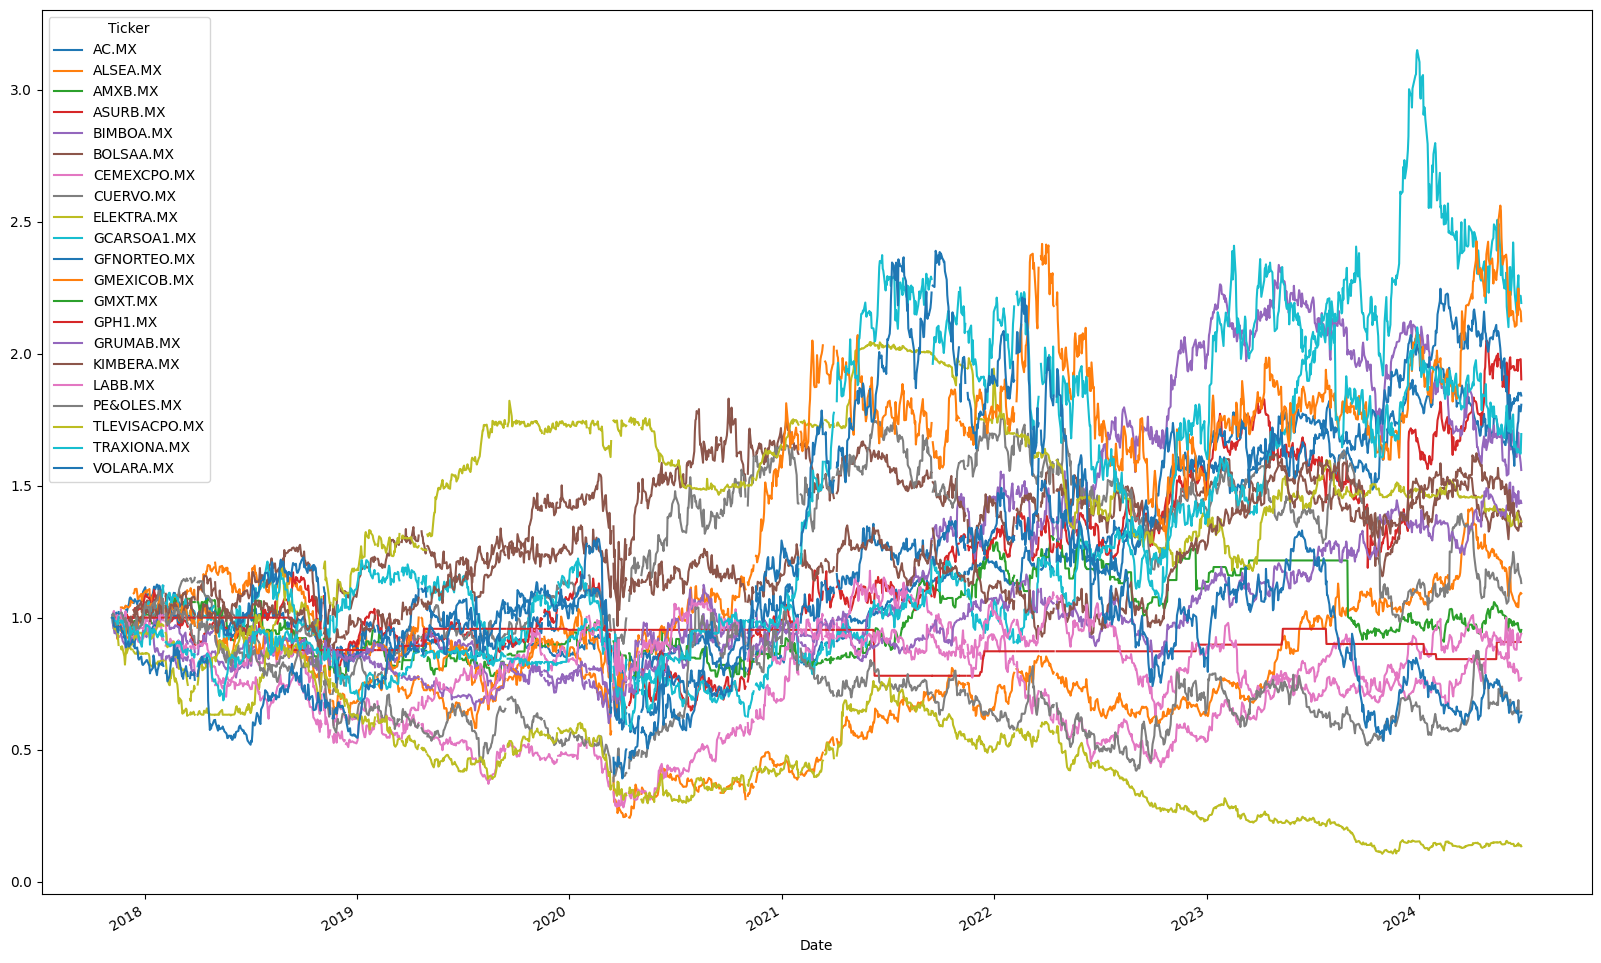

In [47]:
(IPC_prices / IPC_prices.iloc[0]).plot(figsize=(20, 13))

Este es un grafico muy poco visual, con por la saturación de información solicitada, pero podemos deducir algunas cosas.

* Tanto como **Grupo Mexico** y **Grupo Carso** son las doscompañias que tienen mayores rendimientos en este periodo de tiempo.
* Televisa es la compañia mas golpeada, en cuanto a rendimientos.
* Palacio de Hierro se ha mantenido constante en algunos periodos largos de tiempo.

Estas deducciones se van a profundizar mas adelante.

In [50]:
rendimientos_diarios = np.log(df / df.shift(1))
rendimientos_diarios

Ticker,AC.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,ELEKTRA.MX,GCARSOA1.MX,...,GMEXICOB.MX,GMXT.MX,GPH1.MX,GRUMAB.MX,KIMBERA.MX,LABB.MX,PE&OLES.MX,TLEVISACPO.MX,TRAXIONA.MX,VOLARA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-13,0.021207,0.004383,0.000000,-0.003015,0.004793,-0.003764,-0.022780,0.002238,-0.004380,0.006079,...,-0.016274,0.000000,0.0,0.001562,0.007473,0.001365,0.003402,0.013017,-0.003055,0.001620
2017-11-14,-0.012349,-0.003504,-0.035370,-0.025323,0.001365,-0.005989,-0.007268,-0.006730,-0.006637,-0.030772,...,-0.014692,0.000000,0.0,-0.008762,-0.005675,0.015791,-0.010415,-0.022191,0.000000,0.000000
2017-11-15,0.002562,0.014118,0.000000,0.016861,-0.005015,-0.008573,-0.011337,0.005132,-0.010209,-0.014746,...,-0.021590,-0.002861,0.0,-0.008392,-0.003901,0.008469,0.003925,-0.006297,-0.011696,-0.017420
2017-11-16,-0.000320,-0.011138,0.011725,0.004103,0.013618,0.006674,0.007351,-0.003846,0.001445,0.013924,...,0.003603,0.001591,0.0,-0.001303,-0.012099,-0.005341,0.007828,-0.020367,0.001238,-0.006059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-18,0.006807,0.010953,-0.004477,0.018087,0.043702,0.016214,-0.007497,0.000000,0.018378,0.040739,...,0.040118,-0.017126,0.0,0.032423,0.002182,0.062427,0.030644,0.030956,-0.004814,-0.004898
2024-06-19,-0.008825,-0.012957,0.007027,-0.021666,0.008573,-0.002526,0.000000,0.020083,-0.016435,0.008350,...,-0.022263,-0.008947,0.0,-0.003184,-0.007814,0.006320,-0.005409,-0.018859,0.009237,0.016234
2024-06-20,0.016249,-0.000836,-0.016041,0.019370,0.003550,0.007559,-0.016014,-0.019511,-0.004632,0.015262,...,0.045944,-0.006009,0.0,0.012324,-0.000628,-0.026418,0.047119,0.054594,-0.003316,-0.028585


<Axes: xlabel='Date'>

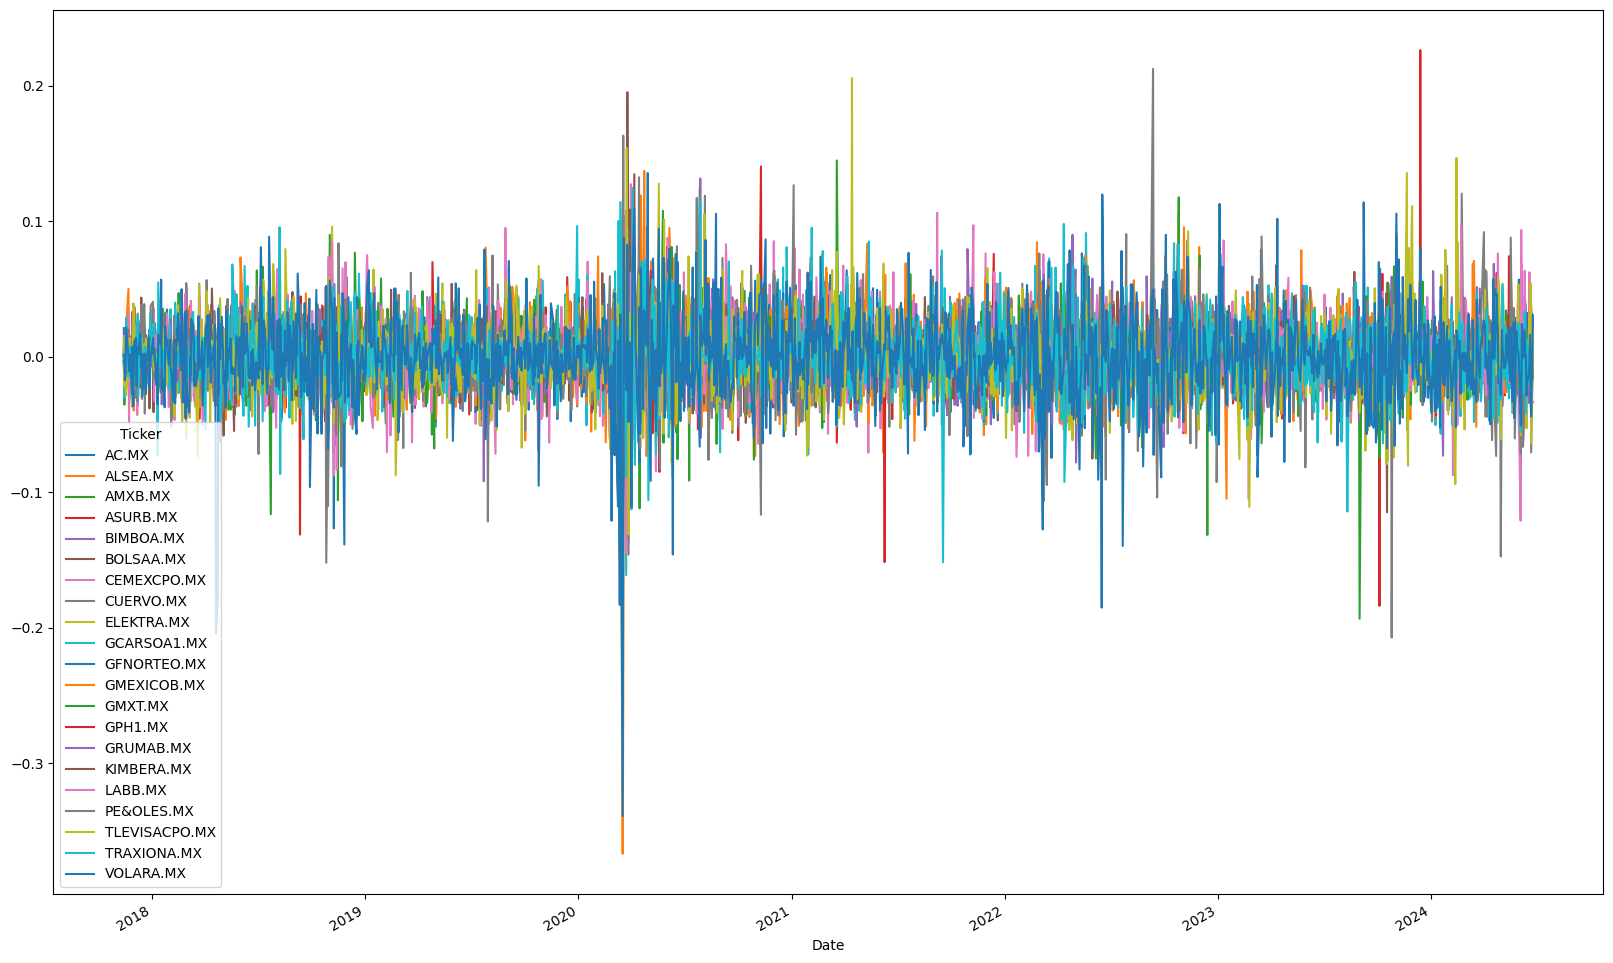

In [51]:
rendimientos_diarios.plot(figsize=(20, 13))

Acá podemos ver que al sacar los rendimientos, la serie se comporta como un ruido blanco, lo que permite aumentar nuestro nivel de análisis.

In [53]:
# Eliminamos los valores nulos de el DataFrame de los rendimientos
rendimientos = rendimientos_diarios.dropna()
rendimientos

Ticker,AC.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,ELEKTRA.MX,GCARSOA1.MX,...,GMEXICOB.MX,GMXT.MX,GPH1.MX,GRUMAB.MX,KIMBERA.MX,LABB.MX,PE&OLES.MX,TLEVISACPO.MX,TRAXIONA.MX,VOLARA.MX
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-13,0.021207,0.004383,0.000000,-0.003015,0.004793,-0.003764,-0.022780,0.002238,-0.004380,0.006079,...,-0.016274,0.000000,0.0,0.001562,0.007473,0.001365,0.003402,0.013017,-0.003055,0.001620
2017-11-14,-0.012349,-0.003504,-0.035370,-0.025323,0.001365,-0.005989,-0.007268,-0.006730,-0.006637,-0.030772,...,-0.014692,0.000000,0.0,-0.008762,-0.005675,0.015791,-0.010415,-0.022191,0.000000,0.000000
2017-11-15,0.002562,0.014118,0.000000,0.016861,-0.005015,-0.008573,-0.011337,0.005132,-0.010209,-0.014746,...,-0.021590,-0.002861,0.0,-0.008392,-0.003901,0.008469,0.003925,-0.006297,-0.011696,-0.017420
2017-11-16,-0.000320,-0.011138,0.011725,0.004103,0.013618,0.006674,0.007351,-0.003846,0.001445,0.013924,...,0.003603,0.001591,0.0,-0.001303,-0.012099,-0.005341,0.007828,-0.020367,0.001238,-0.006059
2017-11-17,0.006935,0.021640,-0.002457,-0.011102,-0.015677,0.009144,-0.007351,0.008633,0.008614,0.018268,...,0.008355,-0.002227,0.0,0.001507,0.002128,-0.008515,0.013572,-0.028524,0.028652,0.021318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-18,0.006807,0.010953,-0.004477,0.018087,0.043702,0.016214,-0.007497,0.000000,0.018378,0.040739,...,0.040118,-0.017126,0.0,0.032423,0.002182,0.062427,0.030644,0.030956,-0.004814,-0.004898
2024-06-19,-0.008825,-0.012957,0.007027,-0.021666,0.008573,-0.002526,0.000000,0.020083,-0.016435,0.008350,...,-0.022263,-0.008947,0.0,-0.003184,-0.007814,0.006320,-0.005409,-0.018859,0.009237,0.016234
2024-06-20,0.016249,-0.000836,-0.016041,0.019370,0.003550,0.007559,-0.016014,-0.019511,-0.004632,0.015262,...,0.045944,-0.006009,0.0,0.012324,-0.000628,-0.026418,0.047119,0.054594,-0.003316,-0.028585


In [56]:
# Obtenemos los rendimientos medios y anualizados
rendimiento_medio = (rendimientos.mean())*252
print(f"Los rendimientos diarios son : {rendimiento_medio}")

Los rendimientos diarios son : Ticker
AC.MX            0.093795
ALSEA.MX         0.019378
AMXB.MX         -0.007767
ASURB.MX         0.107973
BIMBOA.MX        0.076870
BOLSAA.MX        0.050951
CEMEXCPO.MX     -0.042432
CUERVO.MX        0.024844
ELEKTRA.MX       0.045911
GCARSOA1.MX      0.126983
GFNORTEO.MX      0.091348
GMEXICOB.MX      0.121716
GMXT.MX          0.068437
GPH1.MX         -0.014696
GRUMAB.MX        0.064956
KIMBERA.MX       0.049825
LABB.MX         -0.008238
PE&OLES.MX      -0.063923
TLEVISACPO.MX   -0.293247
TRAXIONA.MX      0.075056
VOLARA.MX       -0.066814
dtype: float64


In [60]:
# Descargamos la libreria para hacer gráficos
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

<Axes: title={'center': 'Rendimiento de las Compañias Pertenecientes al IPC'}, xlabel='Equity', ylabel='Rendimiento promedio'>

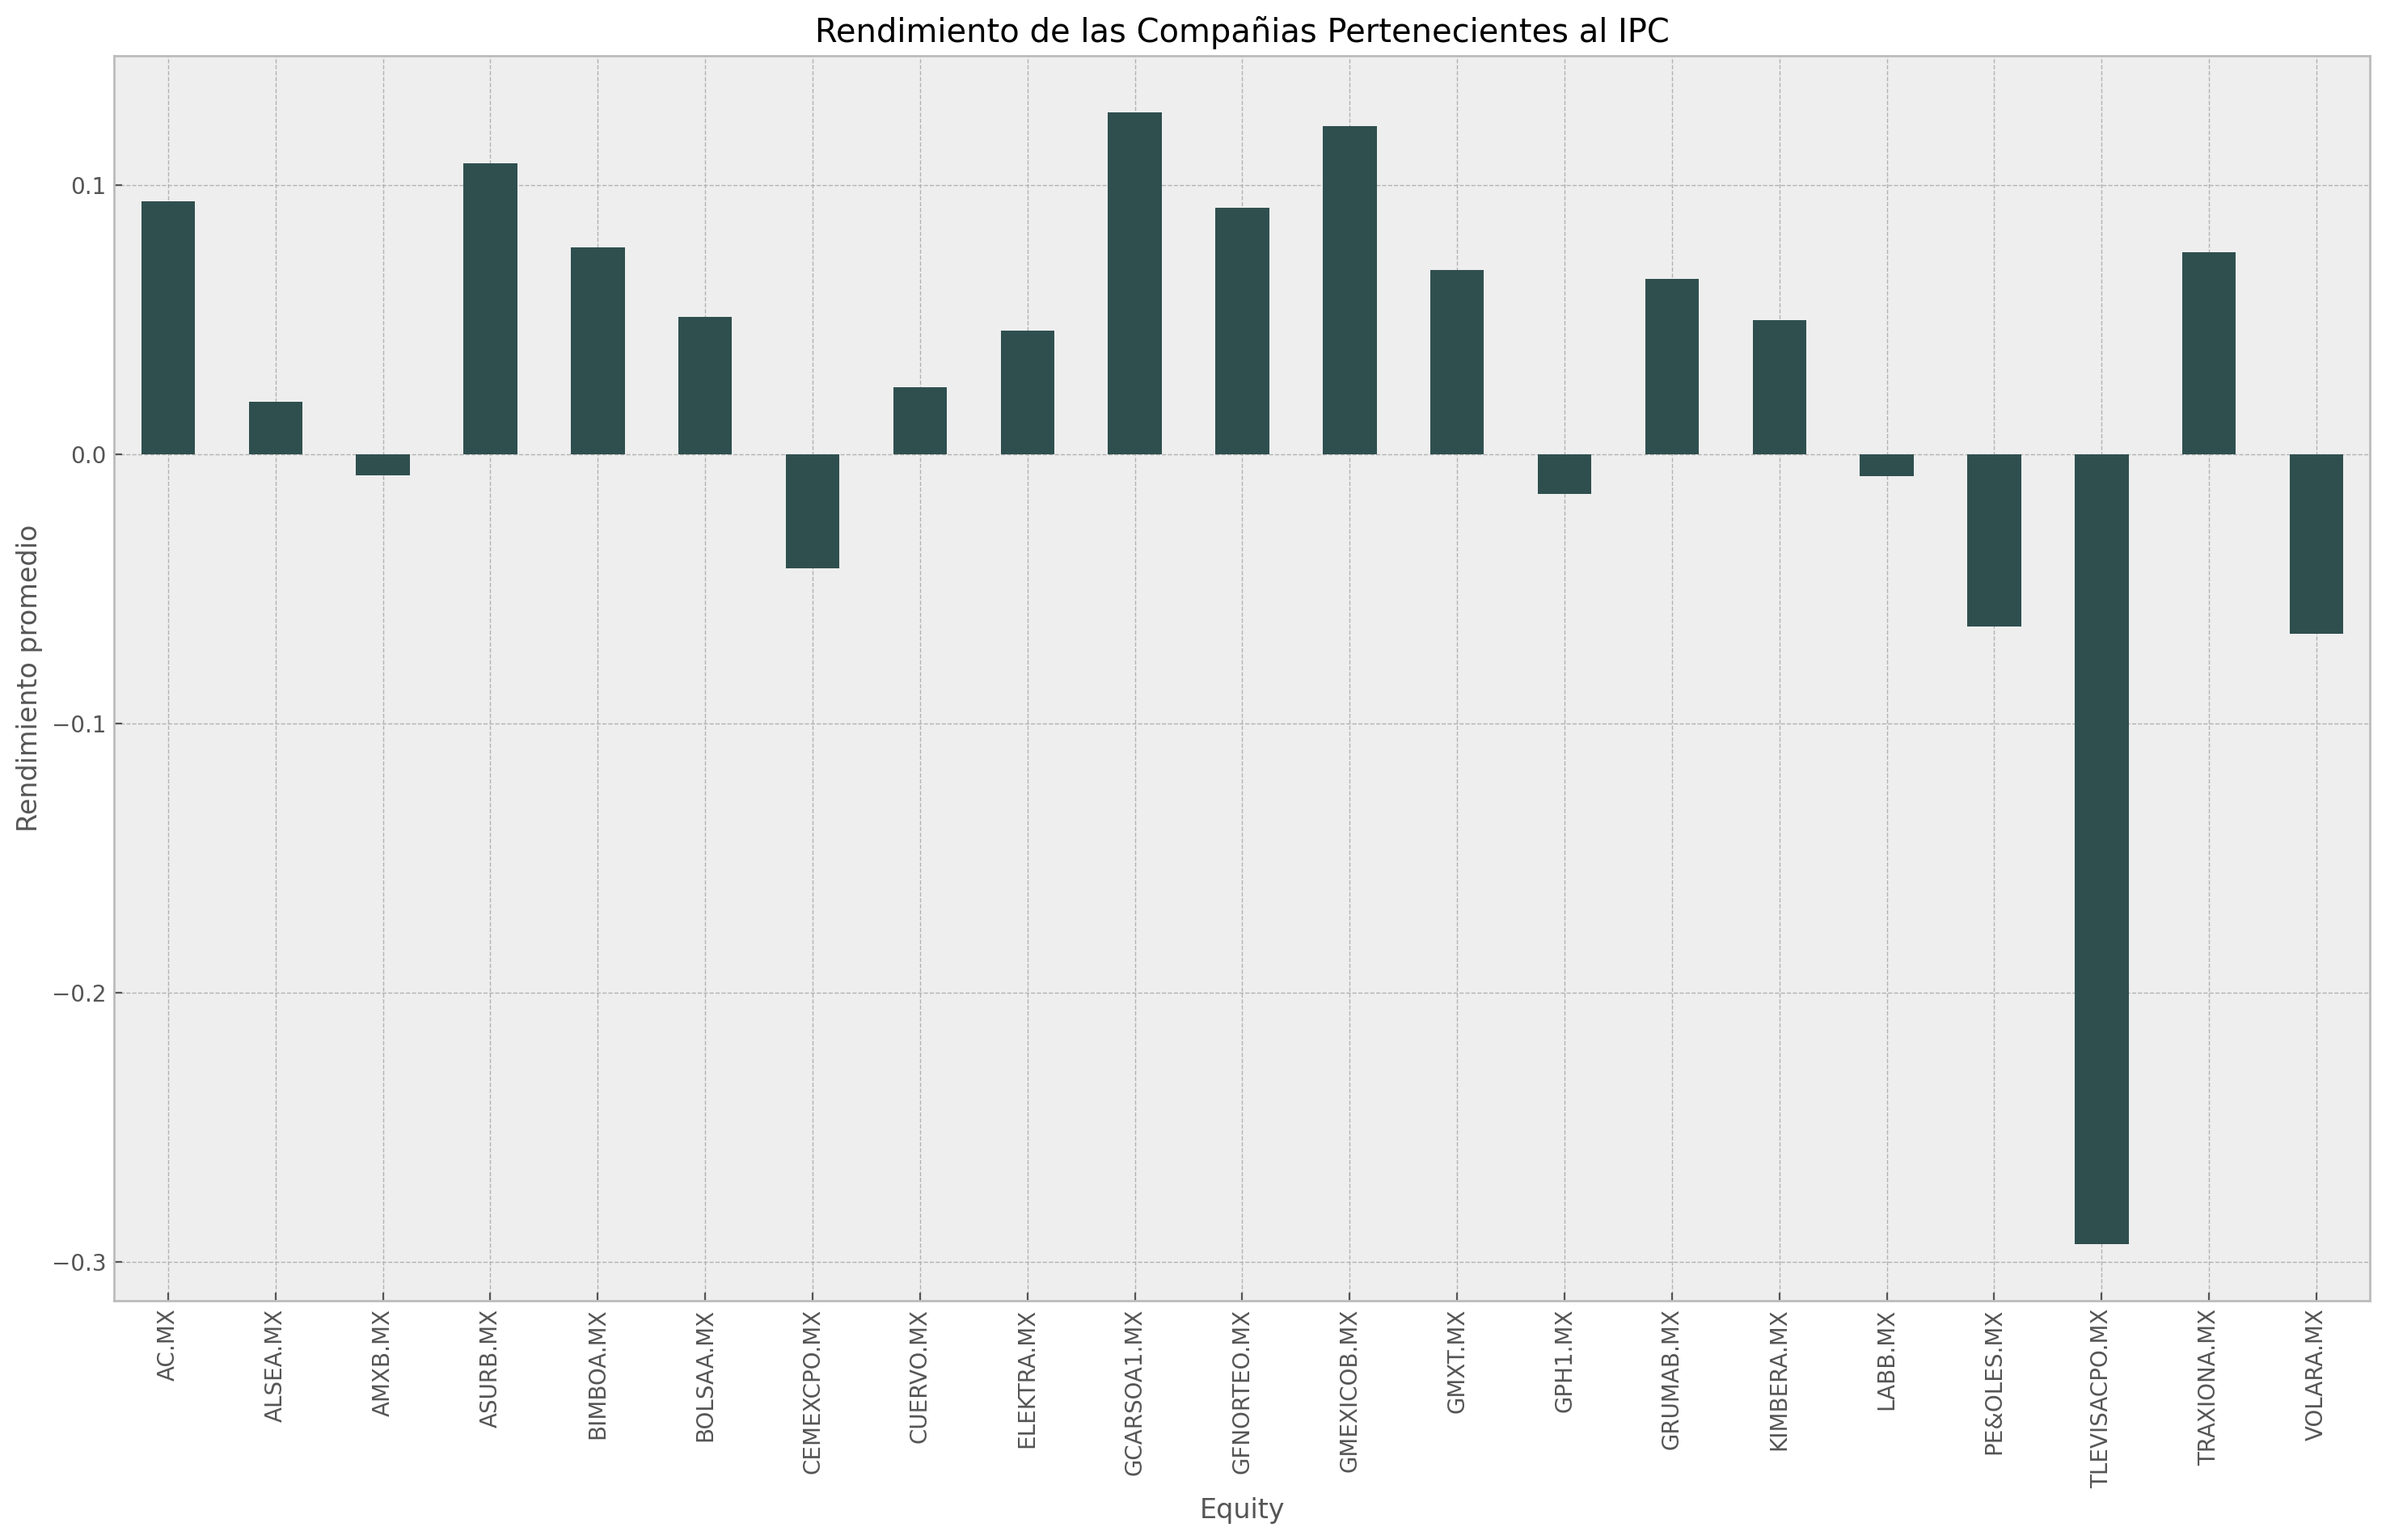

In [62]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.style.use('bmh')

rendimiento_medio.plot(figsize=(18, 10),
                              kind="bar",
                              title="Rendimiento de las Compañias Pertenecientes al IPC",
                              xlabel="Equity",
                              ylabel="Rendimiento promedio",
                              color="darkslategray")

In [66]:
# Convertimos en una Serie los rendimientos medios.
df2 = pd.DataFrame(rendimiento_medio)
df2

,0
Ticker,
AC.MX,0.093795
ALSEA.MX,0.019378
AMXB.MX,-0.007767
ASURB.MX,0.107973
BIMBOA.MX,0.076870
BOLSAA.MX,0.050951
CEMEXCPO.MX,-0.042432
CUERVO.MX,0.024844
ELEKTRA.MX,0.045911


In [67]:
# Sustituimos el nombre de la columna
df2 =  df2.rename(columns={0: "Rendiemiento medios y anualizados"})
df2

,Rendiemiento medios y anualizados
Ticker,
AC.MX,0.093795
ALSEA.MX,0.019378
AMXB.MX,-0.007767
ASURB.MX,0.107973
BIMBOA.MX,0.076870
BOLSAA.MX,0.050951
CEMEXCPO.MX,-0.042432
CUERVO.MX,0.024844
ELEKTRA.MX,0.045911


In [68]:
# Organizamos de mayor a menor, para conocer las mejores 6 compañias del IPC, en cuanto a rendimientos.
df2.sort_values(by="Rendiemiento medios y anualizados", inplace=True, ascending=False)
df2

,Rendiemiento medios y anualizados
Ticker,
GCARSOA1.MX,0.126983
GMEXICOB.MX,0.121716
ASURB.MX,0.107973
AC.MX,0.093795
GFNORTEO.MX,0.091348
BIMBOA.MX,0.076870
TRAXIONA.MX,0.075056
GMXT.MX,0.068437
GRUMAB.MX,0.064956


<Axes: title={'center': 'Rendimiento de las Compañias Pertenecientes al IPC'}, xlabel='Equity', ylabel='Rendimiento promedio'>

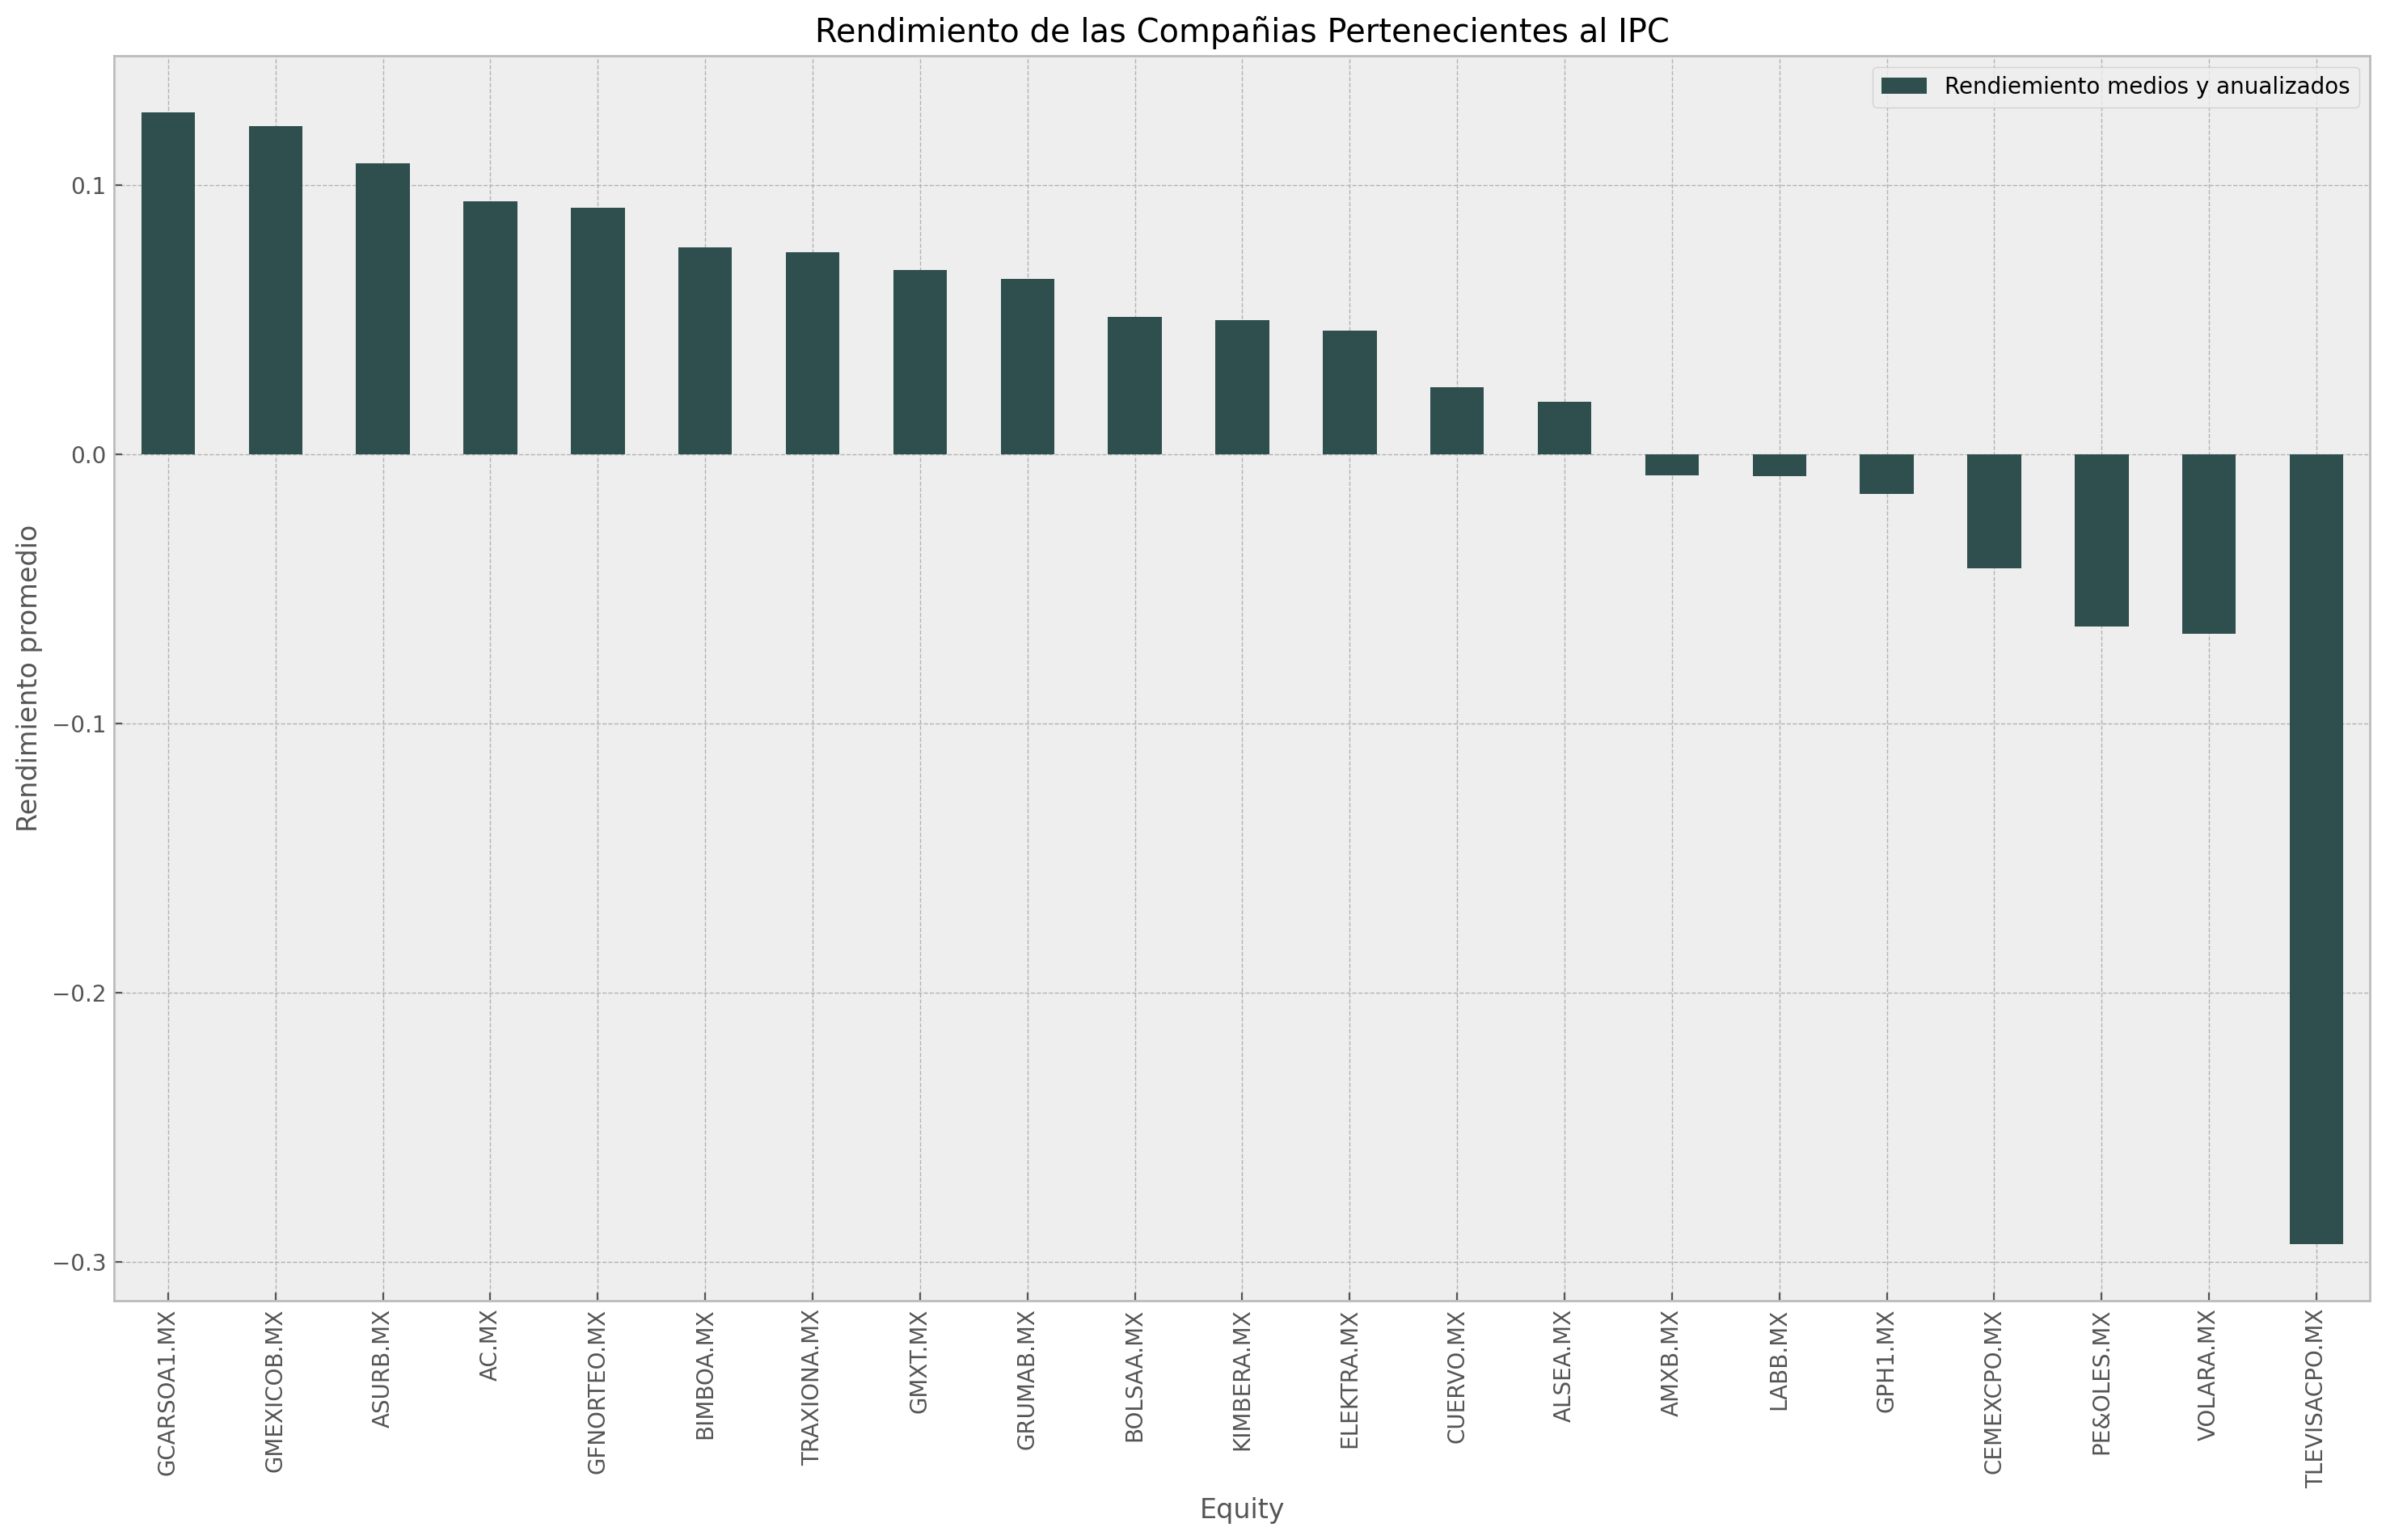

In [76]:
# Gráficamos
%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.style.use('bmh')

df2.plot(figsize=(18, 10),
                              kind="bar",
                              title="Rendimiento de las Compañias Pertenecientes al IPC",
                              xlabel="Equity",
                              ylabel="Rendimiento promedio",
                              color="darkslategray")

Como podemos ver las mejores compañias a invertir en cuanto a rendimientos son:

* G. Carso
* G. México
* Grupo Aeroportuario del Sureste
* Arca Continental
* Banorte
* Bimbo

Recordemos que este análisis no es tan relevante para Graham, pero nos sirve para reducir la búsqueda de empresas, ya que se tiene que hacer un análisis a su valor subyacente de la empresa.

In [81]:
Diccionario_top6 = {"Grupo Carso": 0.126983, "Grupo Mexico": 0.107973, "Grupo Aeroportuario del Sureste": 0.107973,
                    "Arca Continental": 0.093795, "Grupo Financiero Banorte": 0.091348, "Bimbo": 0.076870}
Diccionario_top6

{'Grupo Carso': 0.126983,
 'Grupo Mexico': 0.107973,
 'Grupo Aeroportuario del Sureste': 0.107973,
 'Arca Continental': 0.093795,
 'Grupo Financiero Banorte': 0.091348,
 'Bimbo': 0.07687}

In [85]:
# Creamos una tabla del Top 6
Diccionario_top6 = pd.DataFrame(Diccionario_top6)
Diccionario_top6 =  Diccionario_top6.rename(columns={0: "Rendiemiento medios y anualizados del Top 6"})
Diccionario_top6

,Rendiemiento medios y anualizados del Top 6
Grupo Carso,0.126983
Grupo Mexico,0.107973
Grupo Aeroportuario del Sureste,0.107973
Arca Continental,0.093795
Grupo Financiero Banorte,0.091348
Bimbo,0.076870
